# Homework 2
## ROB-GY 6333 Swarm Robotics
## Alejandro Ojeda Olarte

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import linalg

#graph a
#E_13a = [[0, 1], [0, 2], [2, 3], [3, 0], [2, 5], [3, 6], [6, 3], [3, 4], [4, 7], [1, 4]]

edgesA= [[0,1],[0,2],[1,4],[2,3],[2,7],[3,0],[3,4],[3,6],[4,5],[6,3]]
#graph d 
#E_13d = [[0, 3],[3, 5], [3, 1],[1, 0], [1, 2], [2, 1], [4, 3], [5, 6], [6, 7], [7, 4]]

x_0 = [20, 10, 15, 12, 30, 12, 15, 16]
dt = 0.001
n_vertices = 8



def left_eigen(L):
    l, w = linalg.eig(L, left=True, right=False)
    
    l = np.real(l)
    w = np.real(w)
    
    arr = np.array(l.real).tolist()
    min_index = arr.index(min(arr))
    print(f"the left eigenvectors are {w}")
    print(f"the index is {min_index}")
    print("The eigen vector corresponding to 0 eigen value is:")  
    left_vector = np.divide(w[:,min_index],sum(w[:,min_index]))
    print(left_vector)
    print(np.matmul(left_vector, x_0))
    
    vec1 = np.ones(len(l))
    print(np.matmul(left_vector, vec1))

        
def plot(x, T):
    
    t = [i*0.001 for i in range(int(T/dt))]
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.plot(t, x[0], label="robot 1")
    plt.plot(t, x[1], label="robot 2")
    plt.plot(t, x[2], label="robot 3")
    plt.plot(t, x[3], label="robot 4")
    plt.plot(t, x[4], label="robot 5")
    plt.plot(t, x[5], label="robot 6")
    plt.plot(t, x[6], label="robot 7")
    
    legend = plt.legend(loc='upper right', shadow=True)
    legend.get_frame().set_facecolor('#ffffff')
    
    plt.show()

def convergence(x, vertices):
        for i in range(vertices):
            print("The convergence for robot {}".format(i), x[i][-1])

#Question 4
def get_laplacian(E, n_vertices, flag):
    
    A = np.zeros((n_vertices, n_vertices)) # adjancency matrix
    D = np.zeros((n_vertices, n_vertices)) # degree matrix
    laplacian = np.zeros((n_vertices, n_vertices))

    
    if flag == False:
        # calculate the degree matrix for undirected graph
        for each_vertex in range(n_vertices): # For each_vertex we calculate the degree of that vertex
            degree = 0 

            for i in list(range(0, len(E))):
                for j in list(range(0, 2)):
                    if(E[i][j] == each_vertex):
                        degree += 1
            D[each_vertex][each_vertex] = degree
        
        # Calculate the adjancency matrix
        for each_vertex in range(len(E)):
            x, y= E[each_vertex][0], E[each_vertex][1]

            A[x][y] = 1 
            A[y][x] = 1 

        laplacian = np.subtract(D, A)
        return laplacian
        #print("The laplacian for undrirected graph is\n", laplacian)

    if flag == True:
        #Calculate the degree matrix for directed graph
        for each_vertex in range(n_vertices):
            degree_head = 0

            for i in list(range(len(E))):
                if(E[i][1] == each_vertex):
                    degree_head += 1
            D[each_vertex][each_vertex] = degree_head

        #Calculate the Adjancency matrix
        for each_vertex in range(len(E)):
            x = E[each_vertex][0]
            y = E[each_vertex][1]

            A[y][x] = 1
        
        laplacian = np.subtract(D, A)
        return laplacian
        

def simulate_consensus(x_0, T, L, dt=0.001):

    n_step = int(T/dt)
    x = [n_step*[0] for i in range(8)]

    #x_0 = [20,10,15,12,30,12,15,16,25] #state of robot at initial stage
    
    for i in range(len(x_0)):
        x[i][0] = x_0[i]
    
    for step in range(1,int(T/dt)):
        for r in range(8):
            if(r == 0):
                x[0][step] = x[0][step-1] + dt*(x[3][step-1] - x[0][step-1])
            elif(r == 1):
                x[1][step] = x[1][step-1] + dt*(x[0][step-1] - x[1][step-1])
            elif (r == 2):
                x[2][step] = x[2][step-1] + dt*(x[0][step-1] - x[2][step-1])
            elif(r == 3):
                x[3][step] = x[3][step-1] + dt*(x[6][step-1] + x[2][step-1] - 2*x[3][step-1])
            elif(r == 4):
                x[4][step] = x[4][step-1] + dt*(x[3][step-1] + x[1][step-1] - 2*x[4][step-1])
            elif(r == 5):
                x[5][step] = x[5][step-1] + dt*(x[2][step-1] - x[5][step-1])
            elif(r == 6):
               x[6][step] =  x[6][step-1] + dt*(x[3][step-1] - x[6][step-1])
            elif(r == 7):
                x[7][step] = x[7][step-1] + dt*(x[4][step-1] - x[7][step-1])    
            
    #plot(x, T)
    convergence(x, n_vertices)

L = get_laplacian(edgesA, 8, True)
print(L)
simulate_consensus(x_0, 50, L, dt)
left_eigen(L)

[[ 1.  0.  0. -1.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2.  0.  0. -1.  0.]
 [ 0. -1.  0. -1.  2.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  1.]]
The convergence for robot 0 15.500000000000412
The convergence for robot 1 15.499999999999524
The convergence for robot 2 15.5000000000013
The convergence for robot 3 15.499999999999524
The convergence for robot 4 15.49999999999908
The convergence for robot 5 15.500000000002188
The convergence for robot 6 15.499999999998636
The convergence for robot 7 15.499999999999968
the left eigenvectors are [[ 6.55610068e-01  5.00000000e-01  6.15457455e-01  7.07106781e-01
   4.99999999e-01  5.00000001e-01 -5.00000000e-01  7.07106781e-01]
 [ 2.64906471e-01 -1.34410678e-18  3.48155312e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.64906471e-01 -5.00000000e-01 -3.48155312e-01  1.5

In [ ]:
def get_laplacian(E, n_vertices, flag):

    
    A = np.zeros((n_vertices, n_vertices)) # adjancency matrix
    D = np.zeros((n_vertices, n_vertices)) # degree matrix
    laplacian = np.zeros((n_vertices, n_vertices))

    
    if flag == False:
        # calculate the degree matrix for undirected graph
        for each_vertex in range(n_vertices): # For each_vertex we calculate the degree of that vertex
            degree = 0 

            for i in list(range(0, len(E))):
                for j in list(range(0, 2)):
                    if(E[i][j] == each_vertex):
                        degree += 1
            D[each_vertex][each_vertex] = degree
        
        # Calculate the adjancency matrix
        for each_vertex in range(len(E)):
            x, y= E[each_vertex][0], E[each_vertex][1]

            A[x][y] = 1 
            A[y][x] = 1 

        laplacian = np.subtract(D, A)
        return laplacian
        #print("The laplacian for undrirected graph is\n", laplacian)

    if flag == True:
        #Calculate the degree matrix for directed graph
        for each_vertex in range(n_vertices):
            degree_head = 0

            for i in list(range(len(E))):
                if(E[i][1] == each_vertex):
                    degree_head += 1
            D[each_vertex][each_vertex] = degree_head

        #Calculate the Adjancency matrix
        for each_vertex in range(len(E)):
            x = E[each_vertex][0]
            y = E[each_vertex][1]

            A[y][x] = 1
        
        laplacian = np.subtract(D, A)
        return laplacian
    
print(get_laplacian())

SyntaxError: incomplete input (4175022956.py, line 51)

In [ ]:

"""
Created on Sun Oct 21 15:01:04 2018

@author: kamal
"""

import numpy as np 
import matplotlib.pyplot as plt
from scipy import linalg

#graph a
E_13a = [[0, 1], [0, 2], [2, 3], [3, 0], [2, 5], [3, 6], [6, 3], [3, 4], [4, 7], [1, 4]]


#graph d 
#E_13d = [[0, 3],[3, 5], [3, 1],[1, 0], [1, 2], [2, 1], [4, 3], [5, 6], [6, 7], [7, 4]]

x_0 = [20, 10, 15, 12, 30, 12, 15, 16]
dt = 0.001
n_vertices = 8



def left_eigen(L):
    l, w = linalg.eig(L, left=True, right=False)
    
    l = np.real(l)
    w = np.real(w)
    
    arr = np.array(l.real).tolist()
    min_index = arr.index(min(arr))
    print(f"Eigenvalues are {l}")
    print("The eigen vector corresponding to 0 eigen value is:")  
    left_vector = np.divide(w[:,min_index],sum(w[:,min_index]))
    print(f"vector {left_vector}")
    print(f"vector*x_0 {np.matmul(left_vector, x_0)}")
    
    vec1 = np.ones(len(l))
    print(f"vector * 1 {np.matmul(left_vector, vec1)}")

        
def plot(x, T):
    
    t = [i*0.001 for i in range(int(T/dt))]
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.plot(t, x[0], label="robot 1")
    plt.plot(t, x[1], label="robot 2")
    plt.plot(t, x[2], label="robot 3")
    plt.plot(t, x[3], label="robot 4")
    plt.plot(t, x[4], label="robot 5")
    plt.plot(t, x[5], label="robot 6")
    plt.plot(t, x[6], label="robot 7")
    
    legend = plt.legend(loc='upper right', shadow=True)
    legend.get_frame().set_facecolor('#ffffff')
    
    plt.show()

def convergence(x, vertices):
        for i in range(vertices):
            print("The convergence for robot {}".format(i), x[i][-1])

#Question 4
def get_laplacian(E, n_vertices, flag):
    
    A = np.zeros((n_vertices, n_vertices)) # adjancency matrix
    D = np.zeros((n_vertices, n_vertices)) # degree matrix
    laplacian = np.zeros((n_vertices, n_vertices))

    
    if flag == False:
        # calculate the degree matrix for undirected graph
        for each_vertex in range(n_vertices): # For each_vertex we calculate the degree of that vertex
            degree = 0 

            for i in list(range(0, len(E))):
                for j in list(range(0, 2)):
                    if(E[i][j] == each_vertex):
                        degree += 1
            D[each_vertex][each_vertex] = degree
        
        # Calculate the adjancency matrix
        for each_vertex in range(len(E)):
            x, y= E[each_vertex][0], E[each_vertex][1]

            A[x][y] = 1 
            A[y][x] = 1 

        laplacian = np.subtract(D, A)
        return laplacian
        #print("The laplacian for undrirected graph is\n", laplacian)

    if flag == True:
        #Calculate the degree matrix for directed graph
        for each_vertex in range(n_vertices):
            degree_head = 0

            for i in list(range(len(E))):
                if(E[i][1] == each_vertex):
                    degree_head += 1
            D[each_vertex][each_vertex] = degree_head

        #Calculate the Adjancency matrix
        for each_vertex in range(len(E)):
            x = E[each_vertex][0]
            y = E[each_vertex][1]

            A[y][x] = 1
        #print(f"Degree is {D}")
        #print(f"Adjacency is {A}")
        laplacian = np.subtract(D, A)
        return laplacian
        

def simulate_consensus(x_0, T, L, dt=0.001):

    n_step = int(T/dt)
    x = [n_step*[0] for i in range(8)]

    #x_0 = [20,10,15,12,30,12,15,16,25] #state of robot at initial stage
    
    for i in range(len(x_0)):
        x[i][0] = x_0[i]
    
    for step in range(1,int(T/dt)):
        for r in range(8):
            if(r == 0):
                x[0][step] = x[0][step-1] + dt*(x[3][step-1] - x[0][step-1])
            elif(r == 1):
                x[1][step] = x[1][step-1] + dt*(x[0][step-1] - x[1][step-1])
            elif (r == 2):
                x[2][step] = x[2][step-1] + dt*(x[0][step-1] - x[2][step-1])
            elif(r == 3):
                x[3][step] = x[3][step-1] + dt*(x[6][step-1] + x[2][step-1] - 2*x[3][step-1])
            elif(r == 4):
                x[4][step] = x[4][step-1] + dt*(x[3][step-1] + x[1][step-1] - 2*x[4][step-1])
            elif(r == 5):
                x[5][step] = x[5][step-1] + dt*(x[2][step-1] - x[5][step-1])
            elif(r == 6):
               x[6][step] =  x[6][step-1] + dt*(x[3][step-1] - x[6][step-1])
            elif(r == 7):
                x[7][step] = x[7][step-1] + dt*(x[4][step-1] - x[7][step-1])    
            
#    plot(x, T)
#    convergence(x, n_vertices)

L = get_laplacian(E_13a, 8, True)
simulate_consensus(x_0, 50, L, dt)
left_eigen(L)

Eigenvalues are [ 1.00000000e+00  1.00000000e+00  2.00000000e+00  1.00000000e+00
  2.00000000e+00  2.00000000e+00 -1.45100172e-16  1.00000000e+00]
The eigen vector corresponding to 0 eigen value is:
vector [ 0.25 -0.    0.25  0.25 -0.   -0.    0.25 -0.  ]
vector*x_0 15.5
vector * 1 1.0


In [ ]:
def create_adjacency_matrix(edges, vertices):
    n = len(vertices)
    adj_matrix = [[0] * n for _ in range(n)]  # Initialize with zeros
    for edge in edges:
      source_index = vertices.index(edge[0])  # Get index of source vertex
      dest_index = vertices.index(edge[1])  # Get index of destination vertex
      adj_matrix[source_index][dest_index] = 1  # Set edge connection
      # If undirected, add the reverse edge
      # adj_matrix[dest_index][source_index] = 1 
    return adj_matrix

def degreeMatrix(matrix):

  matrix_np = np.array(matrix) #convert to numpy array if not already
  row_sums = np.sum(matrix_np, axis=1)
  diagonal_matrix = np.diag(row_sums)
  return diagonal_matrix

def eigenvector_of_specific_eigenvalue(matrix, eigenvalue):

    eigenvalues, eigenvectors = scipy.linalg.eig(matrix)
    
    # Find the index of the eigenvalue (if it exists)
    try:
        index = np.where(np.isclose(eigenvalues, eigenvalue))[0][0]
    except IndexError:
        print(f"Eigenvalue {eigenvalue} not found.")
        return None
    
    # Extract the corresponding eigenvector
    eigenvector = eigenvectors[:, index]
    return np.real(eigenvector)

def getLaplacian(edges,vertices):
    adjacency_matrix = create_adjacency_matrix(edges,vertices)
    degree_matrix = degreeMatrix(adjacency_matrix)
    return np.subtract(degree_matrix,adjacency_matrix)

def consensusFromGraph(x_0,edges,vertices):
    laplacian = getLaplacian(edges,vertices)
    eigenVals, leftEigenVectors = scipy.linalg.eig(laplacian, b=None, left=True, right=False)
    eigenVals = np.real(eigenVals)
    leftEV = np.reshape(eigenvector_of_specific_eigenvalue(laplacian,0),(len(x_0),1))
    leftEV = leftEV / np.sum(leftEV)
    print("Eigen values are: ",eigenVals)
    print("\nEigen Vector with corresponding Eigen Value = 0 is: ",leftEV)
    return np.matmul(np.reshape(x_0,(1,len(x_0))),leftEV)

def simConsensus (x_0, T, L, dt=0.001):
    time_arr = np.arange(0,T,dt)
    
    # initialize x
    x = np.zeros((len(x_0),len(time_arr)))
    x[:,0] = x_0     # So that its the first one
   
    for i in range(0,len(time_arr)-1) :
        x[:,i+1] = (np.matmul((-1)*L,x[:,i]))*dt + x[:,i] # Multiply -Lx + the old value to get the new value
        
    for j in range(0,len(x_0)):
        plt.plot(time_arr,x[j,:])    

    plt.ylabel('Robots position')
    plt.xlabel('T (s)')
    plt.show()



array([[ 2, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  2, -1,  0,  0,  0, -1],
       [-1,  0,  0,  3, -1,  0, -1,  0],
       [ 0,  0,  0,  0,  1, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

### Excercise 1
3. Laplacian

In [ ]:
def create_adjacency_matrix(edges, vertices):
    n = len(vertices)
    adj_matrix = [[0] * n for _ in range(n)]  # Initialize with zeros
    for edge in edges:
        source_index = vertices.index(edge[0])  # Get index of source vertex
        dest_index = vertices.index(edge[1])  # Get index of destination vertex
        adj_matrix[source_index][dest_index] = 1  # Set edge connection
        # If undirected, add the reverse edge
        # adj_matrix[dest_index][source_index] = 1 
    return adj_matrix
vertices = ["A", "B", "C", "D","E","F","G","H"]
edges = [("A", "B"), ("A", "C"), ("D", "A"), ("C", "D"), ("C", "F"), ("D", "E"), ("D", "G"), ("G", "D"), ("B", "E"), ("E", "H")]

adjacency_matrix = create_adjacency_matrix(edges,vertices)

print(adjacency_matrix) 

[[0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
def create_adjacency_matrix(edges, vertices):
    n = len(vertices)
    adj_matrix = [[0] * n for _ in range(n)]  # Initialize with zeros
    for edge in edges:
        source_index = vertices.index(edge[0])  # Get index of source vertex
        dest_index = vertices.index(edge[1])  # Get index of destination vertex
        adj_matrix[source_index][dest_index] = 1  # Set edge connection
        # If undirected, add the reverse edge
        # adj_matrix[dest_index][source_index] = 1 
    return adj_matrix
vertices = ["A", "B", "C", "D","E","F","G","H"]
edges = [("A", "B"), ("A", "C"), ("D", "A"), ("C", "D"), ("C", "F"), ("D", "E"), ("D", "G"), ("G", "D"), ("B", "E"), ("E", "H")]

adjacency_matrix = create_adjacency_matrix(edges,vertices)

print(adjacency_matrix) 
def degreeMatrix(matrix):

  matrix_np = np.array(matrix) #convert to numpy array if not already
  row_sums = np.sum(matrix_np, axis=1)
  diagonal_matrix = np.diag(row_sums)
  return diagonal_matrix

degreeMatrix(adjacency_matrix)

def getLaplacian(adjacency_matrix,degree_matrix):
  return degree_matrix - adjacency_matrix

laplacian=getLaplacian(adjacency_matrix,degreeMatrix(adjacency_matrix))
print(laplacian)



value,left,right=scipy.linalg.eig(laplacian,left=True,right=True)
print(value)

def eigenvector_of_specific_eigenvalue(matrix, eigenvalue):

    eigenvalues, eigenvectors = scipy.linalg.eig(matrix)
    
    # Find the index of the eigenvalue (if it exists)
    try:
        index = np.where(np.isclose(eigenvalues, eigenvalue))[0][0]
    except IndexError:
        print(f"Eigenvalue {eigenvalue} not found.")
        return None
    
    # Extract the corresponding eigenvector
    eigenvector = eigenvectors[:, index]
    return eigenvector.real

eigenvector_of_specific_eigenvalue(laplacian,0)

In [ ]:
def degreeMatrix(matrix):

  matrix_np = np.array(matrix) #convert to numpy array if not already
  row_sums = np.sum(matrix_np, axis=1)
  diagonal_matrix = np.diag(row_sums)
  return diagonal_matrix

degreeMatrix(adjacency_matrix)

array([[2, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
def getLaplacian(adjacency_matrix,degree_matrix):
  return degree_matrix - adjacency_matrix

laplacian=getLaplacian(adjacency_matrix,degreeMatrix(adjacency_matrix))
print(laplacian)



value,left,right=scipy.linalg.eig(laplacian,left=True,right=True)
print(value)

[[ 2 -1 -1  0  0  0  0  0]
 [ 0  1  0  0 -1  0  0  0]
 [ 0  0  2 -1  0 -1  0  0]
 [-1  0  0  3 -1  0 -1  0]
 [ 0  0  0  0  1  0  0 -1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0]]
[3.00755236+0.5131158j 3.00755236-0.5131158j 0.50978388+0.j
 1.4751114 +0.j        1.        +0.j        1.        +0.j
 0.        +0.j        0.        +0.j       ]


In [ ]:
def eigenvector_of_specific_eigenvalue(matrix, eigenvalue):

    eigenvalues, eigenvectors = scipy.linalg.eig(matrix)
    
    # Find the index of the eigenvalue (if it exists)
    try:
        index = np.where(np.isclose(eigenvalues, eigenvalue))[0][0]
    except IndexError:
        print(f"Eigenvalue {eigenvalue} not found.")
        return None
    
    # Extract the corresponding eigenvector
    eigenvector = eigenvectors[:, index]
    return eigenvector

eigenvector_of_specific_eigenvalue(laplacian,0)

array([0.23735633+0.j, 0.        +0.j, 0.47471266+0.j, 0.11867817+0.j,
       0.        +0.j, 0.83074716+0.j, 0.11867817+0.j, 0.        +0.j])

2. Nullspace matrix dimension

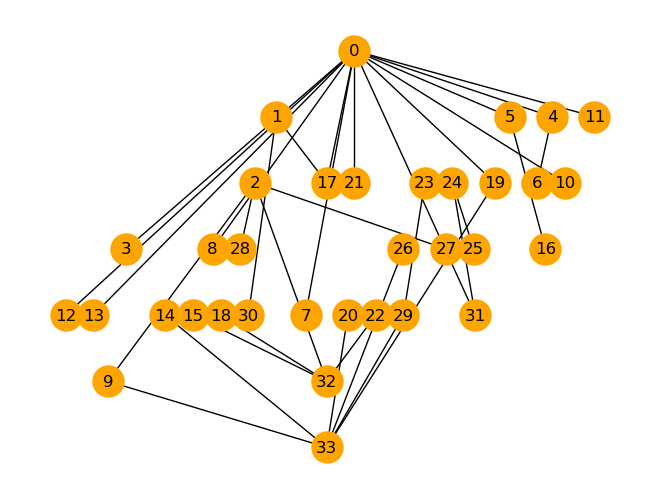

In [ ]:
import networkx as nx 
from networkx.drawing.nx_pydot import graphviz_layout 
G = nx.karate_club_graph() 
T = nx.minimum_spanning_tree(G) 
pos = graphviz_layout(G, prog="dot") 
nx.draw(T, pos, node_size=500, node_color='orange', with_labels=True)

In [ ]:
scipy.linalg.null_space(A2).size
#scipy.linalg.orth(A2)

0

In [ ]:
scipy.linalg.null_space(A3).size
scipy.linalg.orth(scipy.linalg.null_space(A3))

array([[-5.77350269e-01],
       [-5.77350269e-01],
       [-1.38824395e-16],
       [ 5.77350269e-01]])

In [ ]:
scipy.linalg.null_space(A4).size
scipy.linalg.orth(scipy.linalg.null_space(A4))

array([[ 7.07106781e-01],
       [-6.91153972e-17],
       [ 7.07106781e-01]])

## Excercise 2

In [ ]:
A1 = np.array([[0 ,1 ,0 ,2 ,3], [1 ,0 ,0 ,3, 2],[  3,-1, 0, 2, 3], [ 1, -1, 3, 0, 4], [ -2 ,1 ,-2 ,-2 ,3]])
A2 = np.array([[0 ,2 ,3 ,3 ,1], [2 ,0 ,-1 ,2, 3],[  3,-1, 0, 5, 1], [ 3, 2, 5, 0, 2], [ 1 ,3 ,1 ,2 ,6]])

eigenvalues1, eigenvectors1=np.linalg.eig(A1)
print("Real Values")
print(eigenvalues1.real)
print("Complex Values")
print(eigenvalues1.imag)


Real Values
[ 3.06233365  3.06233365 -2.07186986 -0.52639872 -0.52639872]
Complex Values
[ 4.19657394 -4.19657394  0.          1.3000279  -1.3000279 ]


In [ ]:
print("Matrix 2")
eigenvalues2, eigenvectors2=np.linalg.eig(A2)
print("Real Values")
print(eigenvalues2.real)
print("Complex Values")
print(eigenvalues2.imag)

Matrix 2
Real Values
[ 1.02121231e+01  4.68532852e+00  3.93056974e-16 -3.00340298e+00
 -5.89404863e+00]
Complex Values
[0. 0. 0. 0. 0.]


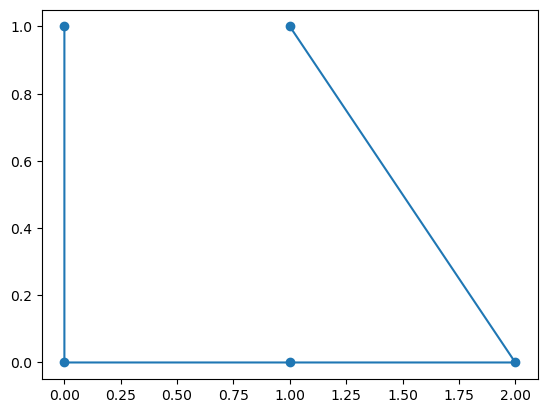

In [ ]:

# Define degree matrix
D = np.diag([1, 2, 3, 2, 2])

# Define Laplacian matrix
L = D - A

# Show graph

XYCoords_0 = np.array([[0 ,1],[ 0, 0],[ 1, 0],[ 2, 0],[ 1, 1]])

XCoords_0 = XYCoords_0[:,0]
YCoords_0 = XYCoords_0[:,1]

import matplotlib.pyplot as plt
plt.plot(XCoords_0,YCoords_0,'o',linestyle='-')

#figure(1); gplot(A,XYCoords_0,'-o'); axis([-1 3 -1 2])

In [ ]:
import scipy
import scipy.integrate
import scipy.optimize

def func(t,x):
    A = np.array([[0 ,1 ,0 ,0 ,0], [1 ,0 ,1 ,0, 0],[  0 ,1, 0, 1, 1], [ 0, 0, 1, 0, 1], [ 0 ,0 ,1 ,1 ,0]])
    # Define degree matrix
    D = np.diag([1, 2, 3, 2, 2])

    # Define Laplacian matrix
    L = D - A
    return -L*x

solX = scipy.integrate.odeint(lambda x,t: -L.dot(x), XCoords_0, [0,15])

#[t_X,XCoords_t] =scipy.integrate.solve_ivp(func, (0, 15), XCoords_0)
#[t_X,XCoords_t] =scipy.integrate.odeint(func, XCoords_0, [0, 15])


## Excercise 3

For this case, there exists two possibilities based on the statement.  

>Due to terrain conditions, wheeled robots can _only_ communicate to _each other_ inside the same team and cannot communicate with wheeled robots or the drone of a different team.

The first possibility is that it mentions that it can conly communicate with each other, therefore it cannot communicate back to the drone in it's team, so the graph would be a directed graph.

The second possibility, is that given that the drone is able to communicate with its own team, but there is not explicit statement that the mobile robot cannot send messages back to the drone, leaves the opportunity to assume it is an undirected graph.

### Sets
Undirected

$V= \{ v_1,v_2,v_3,v_4,v_5,v_6 \}$

$E=\{ (v_1,v_2),(v_1,v_3),(v_3,v_2),(v3,v_4),(v_4,v_5),(v_4,v_6),(v_5,v_6) \}$

Directed

$V= \{ v_1,v_2,v_3,v_4,v_5,v_6 \} \\$

$E=\{ (v_1,v_2),(v_2,v_1),(v_3,v_1),(v_3,v_2),(v3,v_4),(v_4,v_3),(v_4,v_5),(v_4,v_6),(v_5,v_6),(v_6,v_5) \}$

### Graphs

Directed:

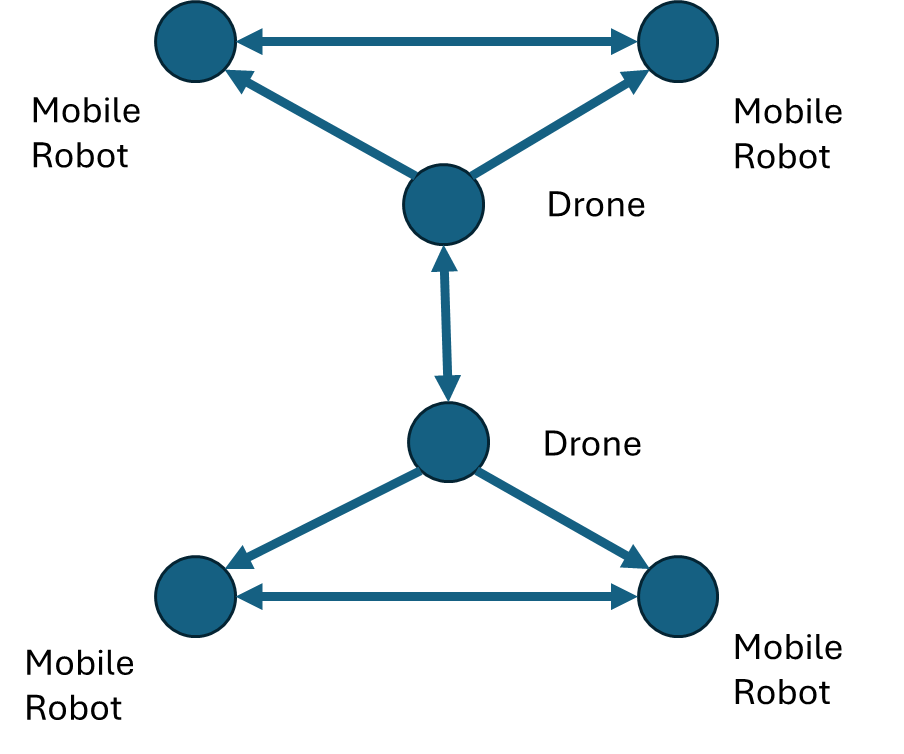


Undirected:

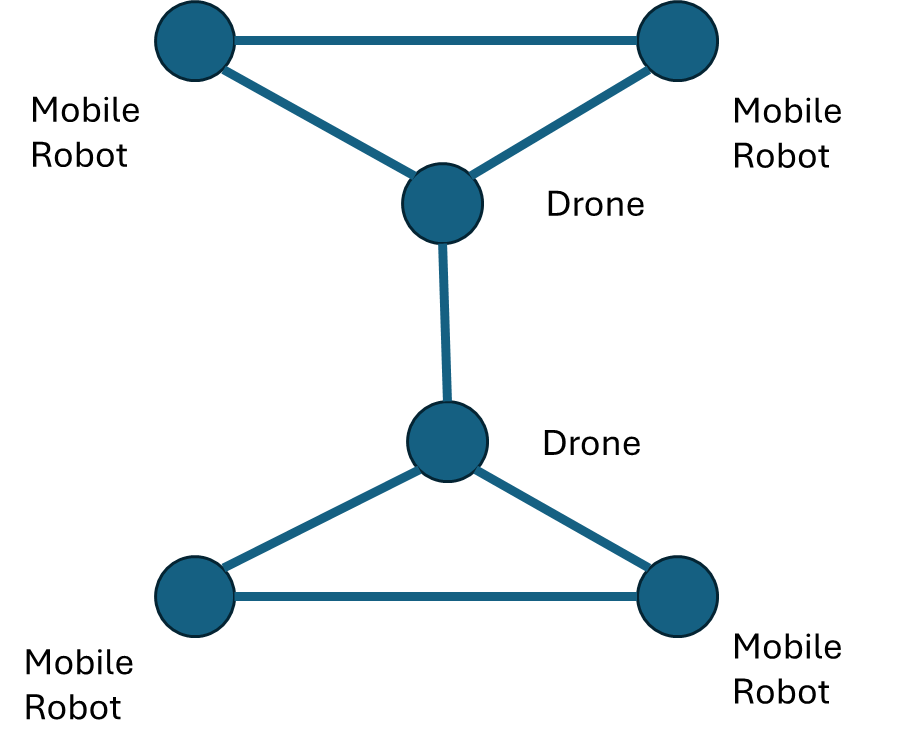


### Connected

Undirected: It is connected as all robots havea route to reach any other robot.

Directed: It is weakly connected as all vertexes have a connection, but not strongly connected as you can't go from a mobile robot to the drone.

### Adjacency Matrix

In [ ]:
print("Undirected Graph")
UndicAdj=np.array([[0 ,1 ,1 ,0 ,0,0], [1 ,0 ,1 ,0, 0,0],[  1 ,1, 0, 1, 0,0], [ 0, 0, 1, 0, 1,1], [ 0 ,0 ,0 ,1 ,0,1],[0 ,0 ,0 ,1 ,1,0]])
print(UndicAdj)

print("Directed Graph")
DicAdj=np.array([[0 ,1 ,0 ,0 ,0,0], [1 ,0 ,0 ,0, 0,0],[  1,1, 0, 1, 0,0], [ 0, 0, 1, 0, 1,1], [ 0 ,0 ,0 ,0 ,0,1],[0 ,0 ,0 ,0 ,1,0]])
print(DicAdj)

Undirected Graph
[[0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 0 1 0 0]
 [0 0 1 0 1 1]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]]
Directed Graph
[[0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 1 0 0]
 [0 0 1 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]]


### Degree Matrix

In [ ]:

print("Directed Degree")
DicDegree=np.array([[2 ,0 ,0 ,0 ,0,0], [0 ,2 ,0 ,0, 0,0],[  0 ,0, 1, 0, 0,0], [ 0, 0, 0, 1, 0,0], [ 0 ,0 ,0 ,0 ,2,0],[0 ,0 ,0 ,0 ,0,2]])
print(DicDegree)

print("Undirected Degree")
UndicDegree=np.array([[2 ,0 ,0 ,0 ,0,0], [0 ,2 ,0 ,0, 0,0],[  0 ,0, 3, 0, 0,0], [ 0, 0, 0, 3, 0,0], [ 0 ,0 ,0 ,0 ,2,0],[0 ,0 ,0 ,0 ,0,2]])
print(UndicDegree)

Directed Degree
[[2 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]
Undirected Degree
[[2 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


### Incidence
For the undirected case.
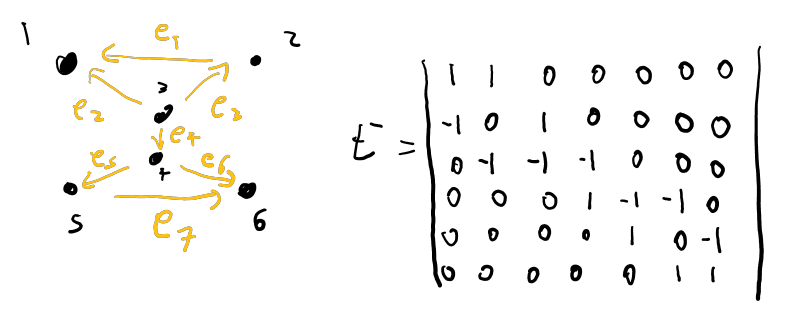

### Laplacian

In [ ]:
print("Directed Laplacian")
DicLaplacian=DicDegree-DicAdj
print(DicLaplacian)

print("Undirected Laplacian")
UndicLaplacian=UndicDegree-UndicAdj
print(UndicLaplacian)

Directed Laplacian
[[ 2 -1  0  0  0  0]
 [-1  2  0  0  0  0]
 [-1 -1  1 -1  0  0]
 [ 0  0 -1  1 -1 -1]
 [ 0  0  0  0  2 -1]
 [ 0  0  0  0 -1  2]]
Undirected Laplacian
[[ 2 -1 -1  0  0  0]
 [-1  2 -1  0  0  0]
 [-1 -1  3 -1  0  0]
 [ 0  0 -1  3 -1 -1]
 [ 0  0  0 -1  2 -1]
 [ 0  0  0 -1 -1  2]]


In [ ]:
eigenVal=np.linalg.eigvals(UndicLaplacian)
np.round(eigenVal,2)

array([4.56, 0.  , 0.44, 3.  , 3.  , 3.  ])

Given that only one of its eigenvalues is zero, it is a connected graph.

## Excercise 4



In [ ]:
L1=np.array([(2,-1,-1,0),(-1,1,0,0),(-1,0,2,-1),(0,0,-1,1)])
L2=np.array([(2,-1,-1,0),(-1,1,0,0),(-1,0,2,-1),(0,0,-1,1)])
L3=np.array([(3,0,-1,-1,-1),(0,2,0,-1,-1),(-1,0,2,-1,0),(-1,-1,-1,3,0),(-1,-1,0,0,2)])
L4=np.array([(2,0,-1,-1,-1),(0,1,0,-1,-1),(-1,0,2,-1,0),(-1,-1,-1,3,0),(-1,-1,0,0,2)])
L5=np.array([(2,0,-1,-1,0),(0,1,0,0,-1),(-1,0,2,-1,0),(-1,0,-1,2,0),(0,-1,0,0,1)])

np.sum(L1,axis=1)

array([0, 0, 0, 0])

In [ ]:
np.sum(L2,axis=1)

array([0, 0, 0, 0])

In [ ]:
np.sum(L3,axis=1)

array([0, 0, 0, 0, 0])

In [ ]:
np.sum(L4,axis=1)

array([-1, -1,  0,  0,  0])

Given that its columns do not add up to 0, L4 can't be a Laplacian.

In [ ]:
np.sum(L5,axis=1)

array([0, 0, 0, 0, 0])

Number of Switches:  49


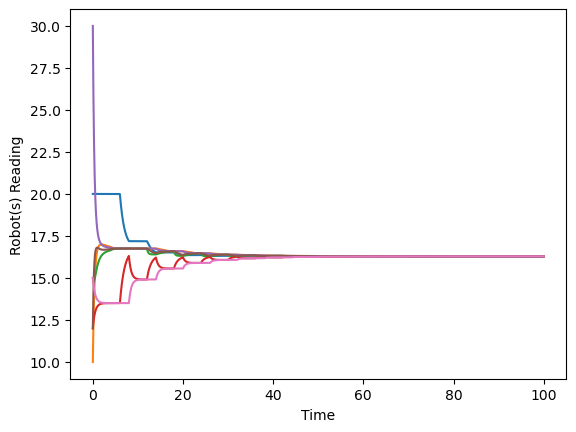

In [11]:
def simulate_consensus_switch (x_0, T, L_list, switch_time, dt =0.001):
    time_arr = np.arange(0,T,dt)
    
    # initialize x
    x = np.zeros((len(x_0),len(time_arr)))
    x[:,0] = x_0     # copy x_0 to 1st col of x
    
    start_time = 0
    end_time = 0
    L_idx = 0
    L = L_list[L_idx]       # Initiaize to first Laplacian

    for i in range(0,len(time_arr)-1) :
        if (round(end_time - start_time,4) == switch_time) :
            L = L_list[L_idx%len(L_list)]
            L_idx = L_idx + 1
            start_time = time_arr[i]
        end_time = time_arr[i+1]
        x[:,i+1] = (-1)*(np.matmul(L,x[:,i]))*dt + x[:,i]

    print("Number of Switches: ",L_idx) 

    for j in range(0,len(x_0)):
        plt.plot(time_arr,x[j,:])    
    plt.ylabel('Robot(s) Reading')
    plt.xlabel('Time')
    plt.show()

if __name__ == '__main__':
    x_0 = [20, 10, 15, 12, 30, 12, 15]  # initial conditions
    T = 100 # simulation time
    switch_time = 2

    # Define graph 
    # E1 = [[0,2],[1,2],[1,4],[2,0],[2,1],[2,3],[2,5],[3,2],[3,6],[4,1],[4,5],[5,2],[5,4],[6,3]] # for Figure 2(a)
    # E2 = [[0,2],[1,2],[1,4],[2,0],[2,1],[2,3],[3,2],[3,6],[4,1],[4,5],[5,4],[6,3]] # for Figure 2(b)
    # E3 = [[0,2],[1,2],[2,0],[2,1],[2,3],[2,5],[3,2],[3,6],[4,5],[5,2],[5,4],[6,3]] # for Figure 2(c)
    # E = [E1,E2,E3]

    # E1 = [[0,2],[1,4],[2,1],[2,3],[2,5],[4,5],[6,3]] # for Figure 3(a)
    # E2 = [[0,2],[1,4],[2,1],[2,3],[3,6],[5,2],[5,4]] # for Figure 3(b)
    # E = [E1,E2]

    E1 = [[1,4],[2,5],[4,5],[6,3]] # for Figure 4(a)
    E2 = [[2,1],[5,4],[3,6]] # for Figure 4(b)
    E3 = [[0,2],[2,3],[5,2]] # for Figure 4(c)
    E = [E1,E2,E3]

    laplacian_list = []
    n_vertices = 7

    for i in range(0,len(E)):
        laplacian_list.append(get_laplacian(E[i],n_vertices,False))


    simulate_consensus_switch(x_0, T, laplacian_list, switch_time, dt =0.001)

## Graphs
a.
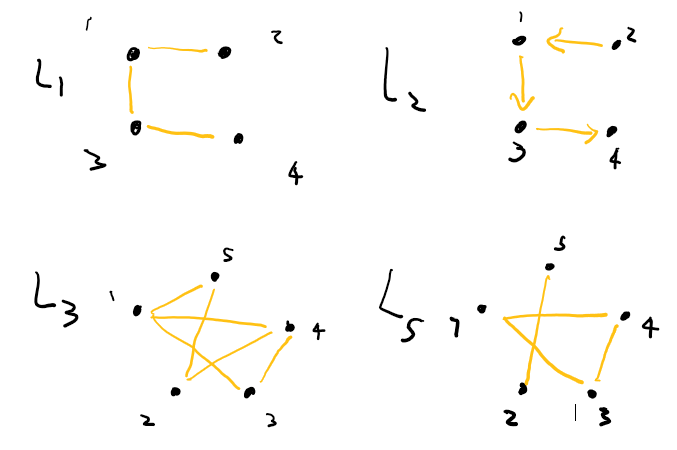

b. Graph L1 and L3 are connected, but L5 is not, as its vertex and 5 are isolated from the rest. L2 is weakly connected as there is only one route to get from 2 to 4, but no way back.

c. L1 and L3 should have exactly one 0 eigenvalue and all be positive. L2 may have complex and multiple zeros. L2 should be all non negative, but may have more than 1 or no zero.

In [ ]:
np.round(np.linalg.eigvals(L1),2)


array([ 3.41,  2.  , -0.  ,  0.59])

In [ ]:
np.linalg.eigvals(L2)

array([ 3.41421356e+00,  2.00000000e+00, -1.97366860e-16,  5.85786438e-01])

In [ ]:
np.round(np.linalg.eigvals(L3),2)

array([-0.  ,  4.62,  3.62,  2.38,  1.38])

In [ ]:
np.round(np.linalg.eigvals(L5),2)

array([ 3., -0.,  0.,  2.,  3.])

In [ ]:
def create_adjacency_matrix(edges, vertices):
    n = len(vertices)
    adj_matrix = [[0] * n for _ in range(n)]  # Initialize with zeros
    for edge in edges:
      source_index = vertices.index(edge[0])  # Get index of source vertex
      dest_index = vertices.index(edge[1])  # Get index of destination vertex
      adj_matrix[source_index][dest_index] = 1  # Set edge connection
      # If undirected, add the reverse edge
      # adj_matrix[dest_index][source_index] = 1 
    return adj_matrix

def degreeMatrix(matrix):

  matrix_np = np.array(matrix) #convert to numpy array if not already
  row_sums = np.sum(matrix_np, axis=1)
  diagonal_matrix = np.diag(row_sums)
  return diagonal_matrix

def eigenvector_of_specific_eigenvalue(matrix, eigenvalue):

    eigenvalues, eigenvectors = scipy.linalg.eig(matrix)
    
    # Find the index of the eigenvalue (if it exists)
    try:
        index = np.where(np.isclose(eigenvalues, eigenvalue))[0][0]
    except IndexError:
        print(f"Eigenvalue {eigenvalue} not found.")
        return None
    
    # Extract the corresponding eigenvector
    eigenvector = eigenvectors[:, index]
    return np.real(eigenvector)

def getLaplacian(edges,vertices):
    adjacency_matrix = create_adjacency_matrix(edges,vertices)
    degree_matrix = degreeMatrix(adjacency_matrix)
    print("Adjacency Matrix is: ",adjacency_matrix)
    print("\nDegree Matrix is: ",degree_matrix)
    return np.subtract(degree_matrix,adjacency_matrix)

def consensusFromGraph(x_0,edges,vertices):
    laplacian = getLaplacian(edges,vertices)
    eigenVals, leftEigenVectors = scipy.linalg.eig(laplacian, b=None, left=True, right=False)
    eigenVals = np.real(eigenVals)
    leftEV = np.reshape(eigenvector_of_specific_eigenvalue(laplacian,0),(len(x_0),1))
    leftEV = leftEV / np.sum(leftEV)
    print("Eigen values are: ",eigenVals)
    print("\nEigen Vector with corresponding Eigen Value = 0 is: ",leftEV)
    return np.matmul(np.reshape(x_0,(1,len(x_0))),leftEV)